In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
import hopsworks

# Login to the Hopsworks project using your API key
project = hopsworks.login(
    api_key_value="mAaHAWHefj9ff3oE.OgcnSgFgldipqzmX8pbMMnkM2sEY2SpIeGVrrcuIlNwwM5I89Oe3jZj2C8CE8oTm")

# Get the feature store instance
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1047702
2024-10-18 15:35:36,477 WARNING: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead

2024-10-18 15:35:36,478 WARNING: using legacy validation callback
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
feature_group_final = fs.get_feature_group(name='df', version=1)

In [4]:
df = feature_group_final.read()
df

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.95s) 


,truck_id,route_id,departure_date,estimated_arrival,delay,route_avg_temp,route_avg_wind_speed,route_avg_humidity,route_avg_pressure,route_precip,...,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,is_midnight,unique_id,event_date
0,21569652,R-9a508f91,2019-01-22 07:00:00+00:00,2019-01-22 16:01:48+00:00,0,70.333333,6.666667,75.000000,1018.333333,0.0,...,male,43.0,3.0,proactive,8.0,21569652.0,59.290001,0,1241,2024-10-16 00:00:00+00:00
1,16928992,R-b5a32b38,2019-02-12 07:00:00+00:00,2019-02-12 19:37:12+00:00,0,61.500000,9.250000,51.750000,1017.500000,0.0,...,male,49.0,8.0,proactive,4.0,16928992.0,62.060001,0,294,2024-10-16 00:00:00+00:00
2,21103543,R-7278d1fc,2019-01-31 07:00:00+00:00,2019-01-31 19:45:00+00:00,0,57.500000,6.750000,58.000000,1008.500000,0.0,...,male,52.0,17.0,conservative,7.0,21103543.0,44.580002,0,1239,2024-10-16 00:00:00+00:00
3,17867711,R-82117701,2019-01-16 07:00:00+00:00,2019-01-17 05:16:12+00:00,1,69.400000,6.600000,59.600000,1010.600000,0.1,...,female,50.0,8.0,conservative,3.0,17867711.0,29.150000,1,8886,2024-10-16 00:00:00+00:00
4,28973978,R-68283907,2019-01-10 07:00:00+00:00,2019-01-11 03:36:00+00:00,0,53.200000,3.800000,97.400000,1019.600000,0.0,...,male,49.0,1.0,proactive,3.0,28973978.0,57.869999,1,8134,2024-10-16 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10477,31874571,R-aec135f8,2019-01-01 07:00:00+00:00,2019-01-02 01:06:36+00:00,0,56.800000,5.800000,76.400000,1017.000000,0.0,...,male,51.0,16.0,conservative,6.0,31874571.0,49.700001,1,701,2024-10-16 00:00:00+00:00
10478,26739096,R-3066c652,2019-01-22 07:00:00+00:00,2019-01-22 16:51:36+00:00,1,63.000000,6.666667,85.666667,1019.666667,0.0,...,male,43.0,13.0,proactive,4.0,26739096.0,63.779999,0,1001,2024-10-16 00:00:00+00:00
10479,27188149,R-96c626c0,2019-01-19 07:00:00+00:00,2019-01-20 03:48:36+00:00,1,59.000000,8.800000,74.400000,1014.800000,0.0,...,male,41.0,1.0,conservative,3.0,27188149.0,50.480000,1,10313,2024-10-16 00:00:00+00:00
10480,27082207,R-c1cf4d40,2019-01-19 07:00:00+00:00,2019-01-19 17:19:12+00:00,0,48.000000,5.000000,96.000000,1015.000000,0.0,...,male,52.0,22.0,proactive,6.0,27082207.0,63.630001,0,6208,2024-10-16 00:00:00+00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10482 entries, 0 to 10481
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   truck_id                        10482 non-null  int32              
 1   route_id                        10482 non-null  object             
 2   departure_date                  10482 non-null  datetime64[us, UTC]
 3   estimated_arrival               10482 non-null  datetime64[us, UTC]
 4   delay                           10482 non-null  int32              
 5   route_avg_temp                  10482 non-null  float64            
 6   route_avg_wind_speed            10482 non-null  float64            
 7   route_avg_humidity              10482 non-null  float64            
 8   route_avg_pressure              10482 non-null  float64            
 9   route_precip                    10482 non-null  float32            
 10  route_visi

In [6]:
df.columns

Index(['truck_id', 'route_id', 'departure_date', 'estimated_arrival', 'delay',
       'route_avg_temp', 'route_avg_wind_speed', 'route_avg_humidity',
       'route_avg_pressure', 'route_precip', 'route_visibility',
       'route_description', 'estimated_arrival_nearest_hour',
       'departure_date_nearest_hour', 'origin_id', 'destination_id',
       'distance', 'average_hours', 'origin_temp', 'origin_wind_speed',
       'origin_description', 'origin_precip', 'origin_humidity',
       'origin_visibility', 'origin_pressure', 'dest_temp', 'dest_wind_speed',
       'dest_description', 'dest_precip', 'dest_humidity', 'dest_visibility',
       'dest_pressure', 'avg_no_of_vehicles', 'accident', 'truck_age',
       'load_capacity_pounds', 'mileage_mpg', 'fuel_type', 'driver_id', 'name',
       'gender', 'age', 'experience', 'driving_style', 'ratings', 'vehicle_no',
       'average_speed_mph', 'is_midnight', 'unique_id', 'event_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10482 entries, 0 to 10481
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   truck_id                        10482 non-null  int32              
 1   route_id                        10482 non-null  object             
 2   departure_date                  10482 non-null  datetime64[us, UTC]
 3   estimated_arrival               10482 non-null  datetime64[us, UTC]
 4   delay                           10482 non-null  int32              
 5   route_avg_temp                  10482 non-null  float64            
 6   route_avg_wind_speed            10482 non-null  float64            
 7   route_avg_humidity              10482 non-null  float64            
 8   route_avg_pressure              10482 non-null  float64            
 9   route_precip                    10482 non-null  float32            
 10  route_visi

In [8]:
df.dtypes

truck_id                                        int32
route_id                                       object
departure_date                    datetime64[us, UTC]
estimated_arrival                 datetime64[us, UTC]
delay                                           int32
route_avg_temp                                float64
route_avg_wind_speed                          float64
route_avg_humidity                            float64
route_avg_pressure                            float64
route_precip                                  float32
route_visibility                              float64
route_description                              object
estimated_arrival_nearest_hour    datetime64[us, UTC]
departure_date_nearest_hour       datetime64[us, UTC]
origin_id                                      object
destination_id                                 object
distance                                      float32
average_hours                                 float32
origin_temp                 

In [9]:
df = df.drop(columns=['unique_id', 'event_date'])

In [10]:
df['departure_date'] = pd.to_datetime(
    df['departure_date']).dt.strftime('%Y-%m-%d %H:%M:%S')
df['estimated_arrival'] = pd.to_datetime(
    df['estimated_arrival']).dt.strftime('%Y-%m-%d %H:%M:%S')
df['estimated_arrival_nearest_hour'] = pd.to_datetime(
    df['estimated_arrival_nearest_hour']).dt.strftime('%Y-%m-%d %H:%M:%S')
df['departure_date_nearest_hour'] = pd.to_datetime(
    df['departure_date_nearest_hour']).dt.strftime('%Y-%m-%d %H:%M:%S')

In [11]:
df

,truck_id,route_id,departure_date,estimated_arrival,delay,route_avg_temp,route_avg_wind_speed,route_avg_humidity,route_avg_pressure,route_precip,...,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,is_midnight
0,21569652,R-9a508f91,2019-01-22 07:00:00,2019-01-22 16:01:48,0,70.333333,6.666667,75.000000,1018.333333,0.0,...,21b1ab31-0,Daniel Davis,male,43.0,3.0,proactive,8.0,21569652.0,59.290001,0
1,16928992,R-b5a32b38,2019-02-12 07:00:00,2019-02-12 19:37:12,0,61.500000,9.250000,51.750000,1017.500000,0.0,...,6d838268-c,Curtis Wilson,male,49.0,8.0,proactive,4.0,16928992.0,62.060001,0
2,21103543,R-7278d1fc,2019-01-31 07:00:00,2019-01-31 19:45:00,0,57.500000,6.750000,58.000000,1008.500000,0.0,...,ed4938a6-0,Cody Hernandez,male,52.0,17.0,conservative,7.0,21103543.0,44.580002,0
3,17867711,R-82117701,2019-01-16 07:00:00,2019-01-17 05:16:12,1,69.400000,6.600000,59.600000,1010.600000,0.1,...,72e45008-5,Julia Graham,female,50.0,8.0,conservative,3.0,17867711.0,29.150000,1
4,28973978,R-68283907,2019-01-10 07:00:00,2019-01-11 03:36:00,0,53.200000,3.800000,97.400000,1019.600000,0.0,...,2f6b4176-3,Danny Short,male,49.0,1.0,proactive,3.0,28973978.0,57.869999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10477,31874571,R-aec135f8,2019-01-01 07:00:00,2019-01-02 01:06:36,0,56.800000,5.800000,76.400000,1017.000000,0.0,...,131c2685-6,Brian Gardner,male,51.0,16.0,conservative,6.0,31874571.0,49.700001,1
10478,26739096,R-3066c652,2019-01-22 07:00:00,2019-01-22 16:51:36,1,63.000000,6.666667,85.666667,1019.666667,0.0,...,1c103526-1,Thomas Shields,male,43.0,13.0,proactive,4.0,26739096.0,63.779999,0
10479,27188149,R-96c626c0,2019-01-19 07:00:00,2019-01-20 03:48:36,1,59.000000,8.800000,74.400000,1014.800000,0.0,...,8df318b0-4,Christopher Smith,male,41.0,1.0,conservative,3.0,27188149.0,50.480000,1
10480,27082207,R-c1cf4d40,2019-01-19 07:00:00,2019-01-19 17:19:12,0,48.000000,5.000000,96.000000,1015.000000,0.0,...,a11be83c-d,Adam Hogan,male,52.0,22.0,proactive,6.0,27082207.0,63.630001,0


In [12]:
df.isnull().sum()

truck_id                          0
route_id                          0
departure_date                    0
estimated_arrival                 0
delay                             0
route_avg_temp                    0
route_avg_wind_speed              0
route_avg_humidity                0
route_avg_pressure                0
route_precip                      0
route_visibility                  0
route_description                 0
estimated_arrival_nearest_hour    0
departure_date_nearest_hour       0
origin_id                         0
destination_id                    0
distance                          0
average_hours                     0
origin_temp                       0
origin_wind_speed                 0
origin_description                0
origin_precip                     0
origin_humidity                   0
origin_visibility                 0
origin_pressure                   0
dest_temp                         0
dest_wind_speed                   0
dest_description            

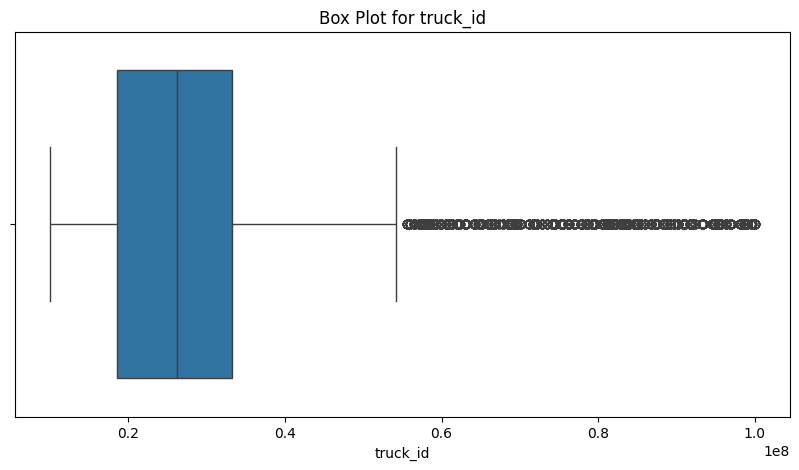

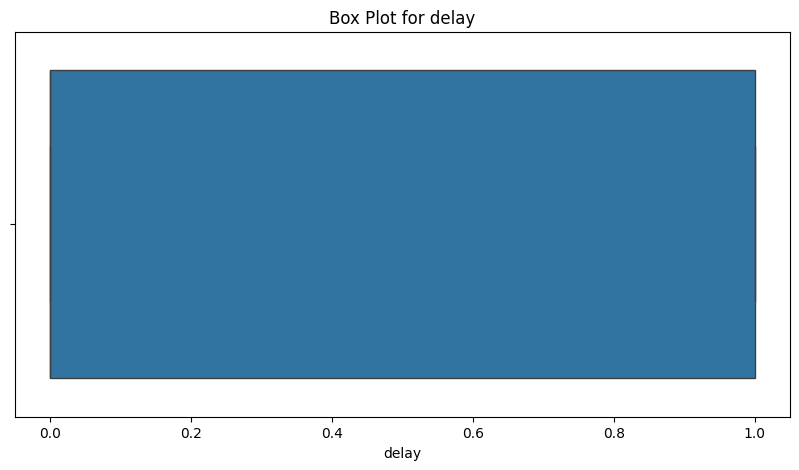

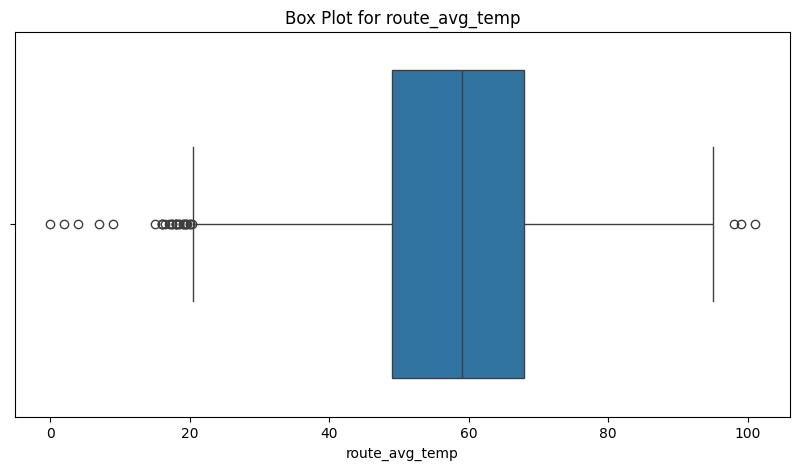

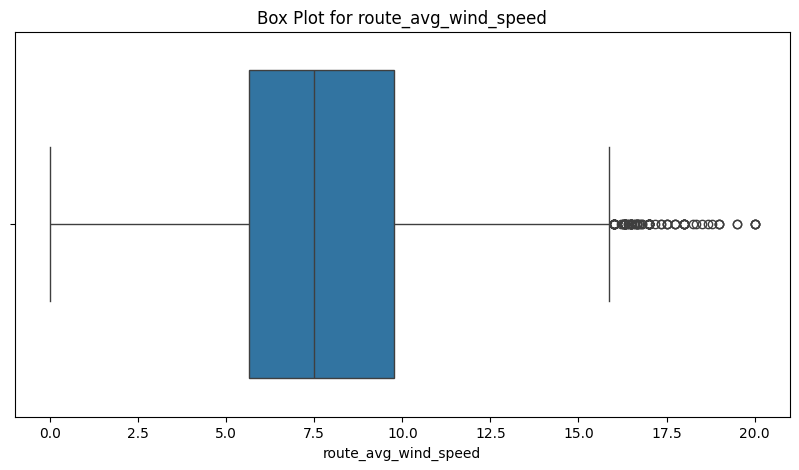

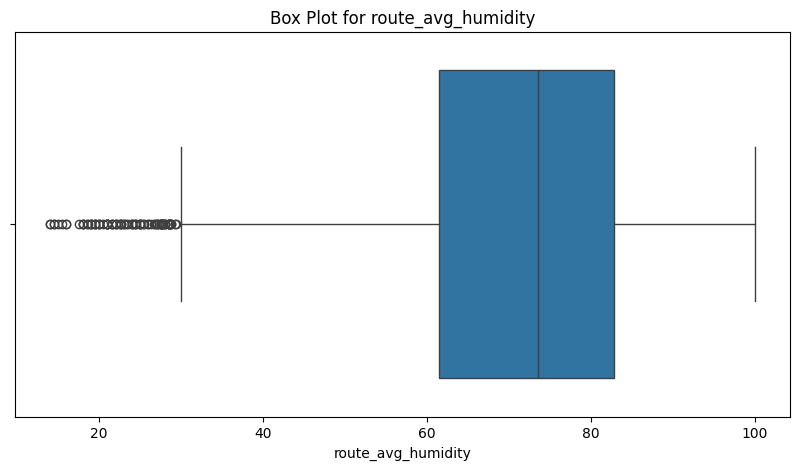

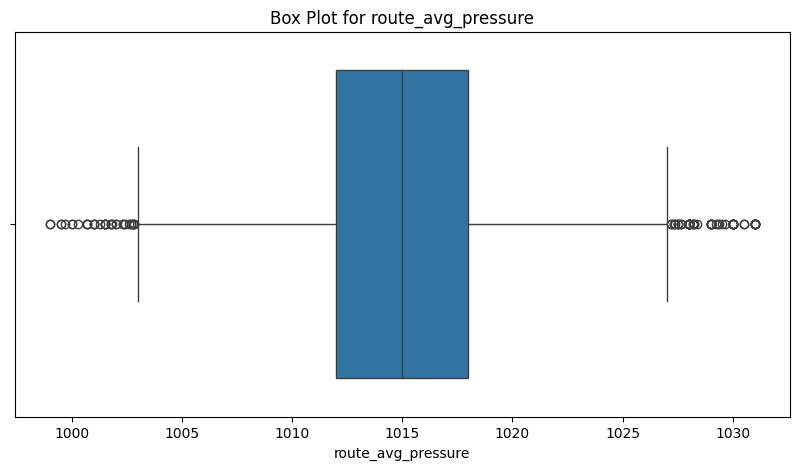

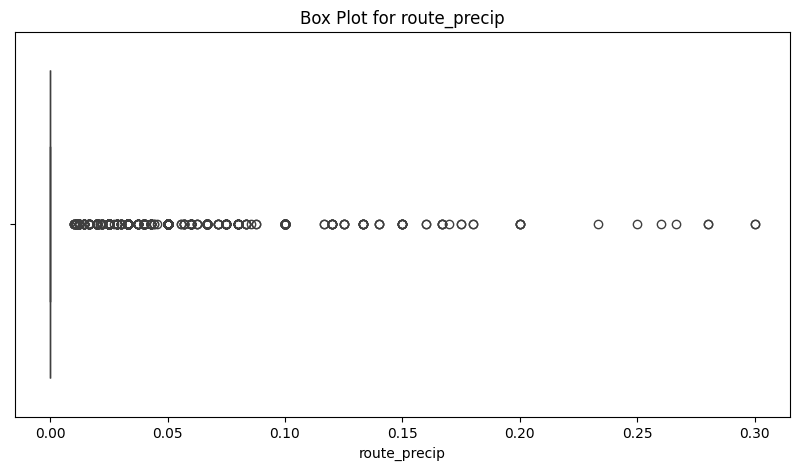

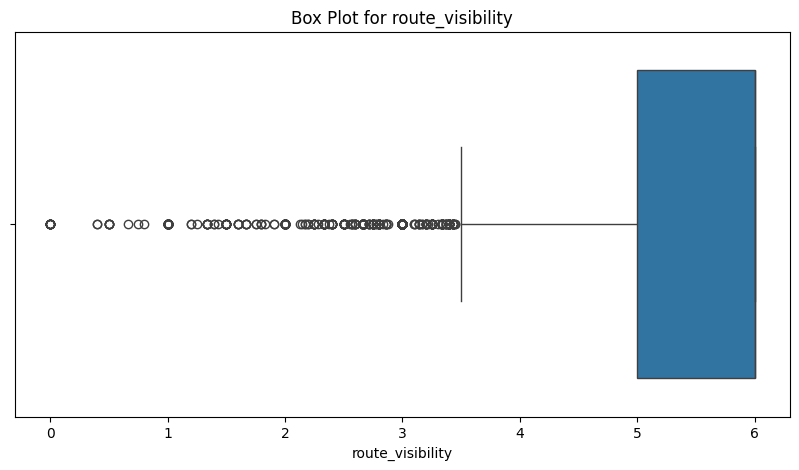

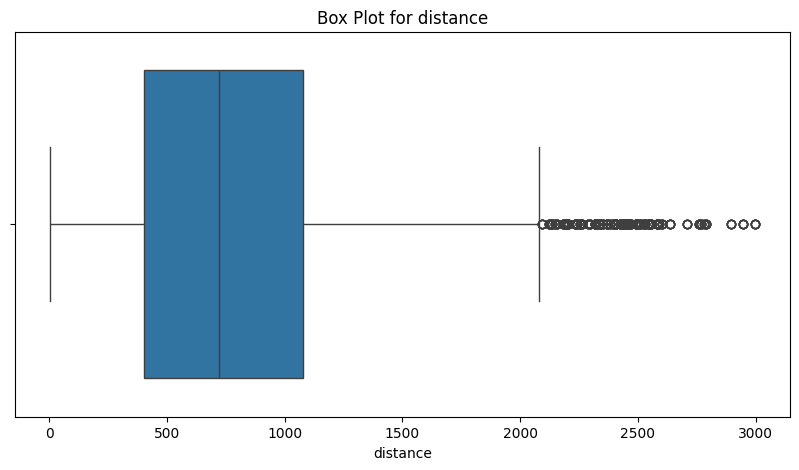

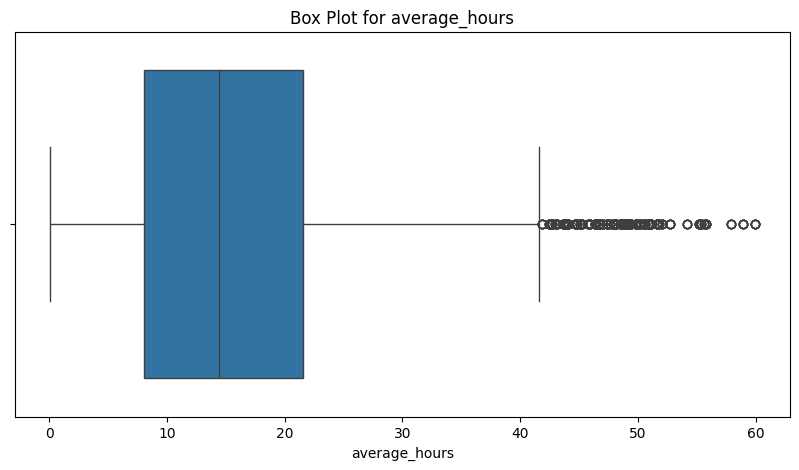

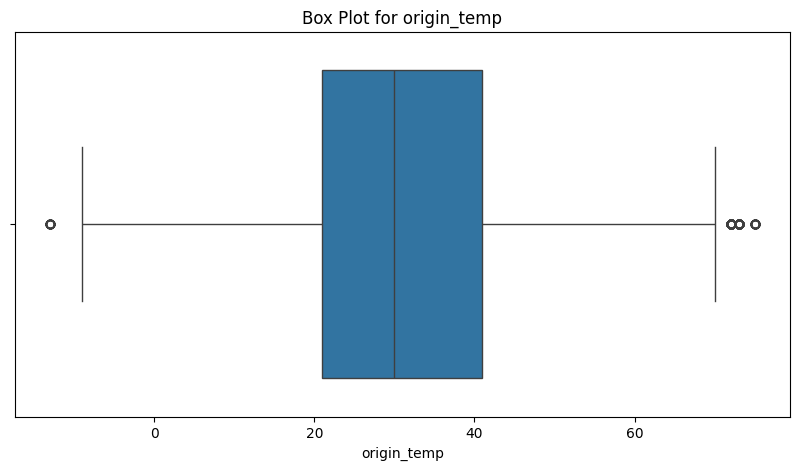

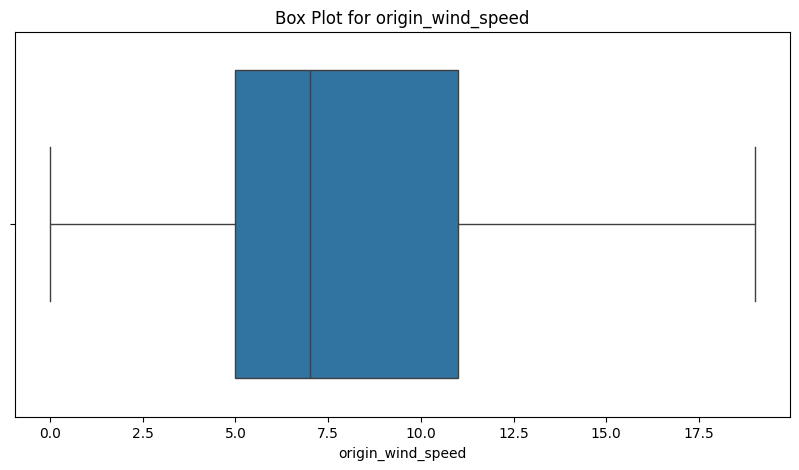

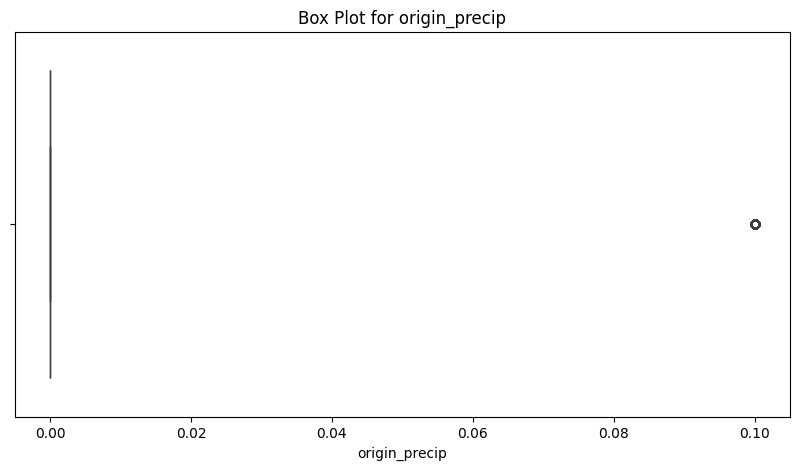

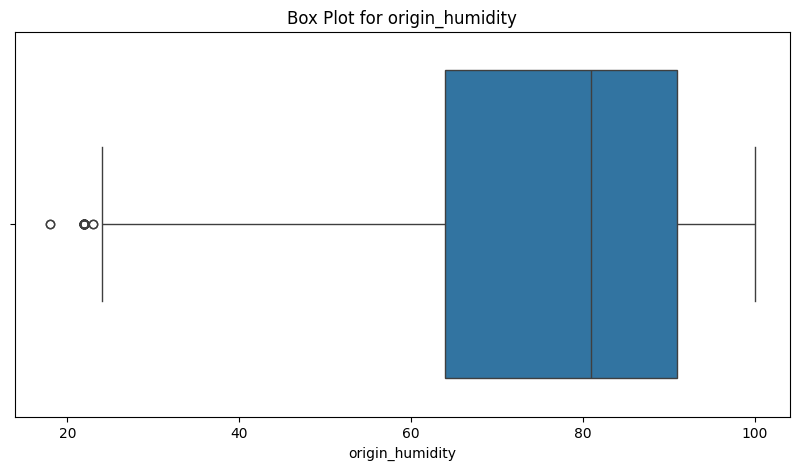

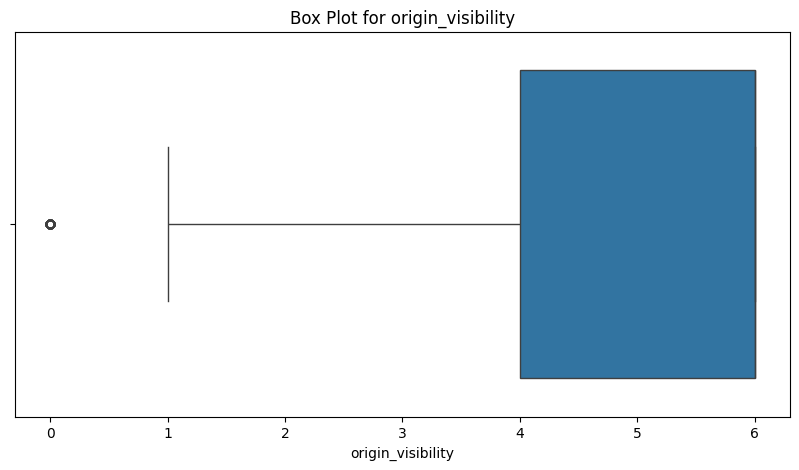

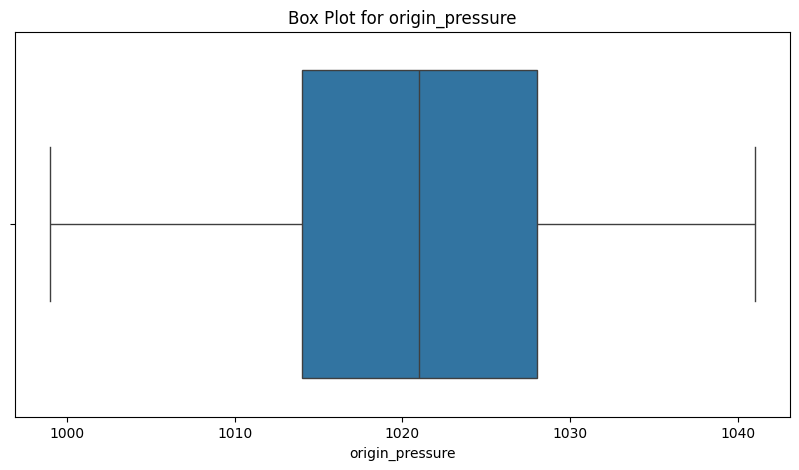

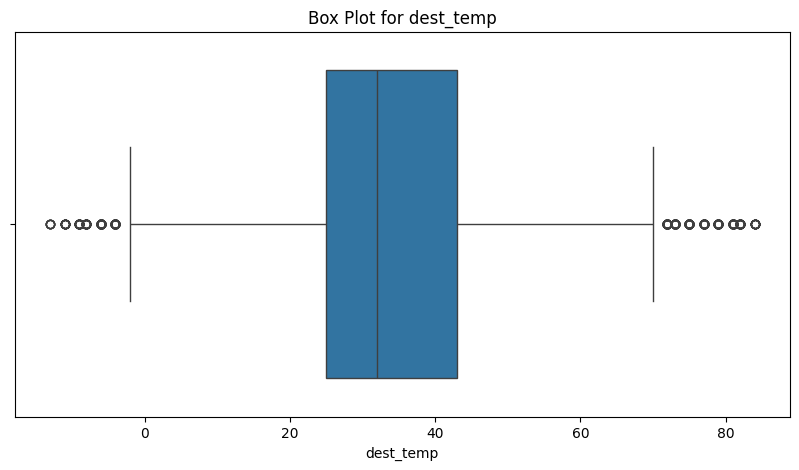

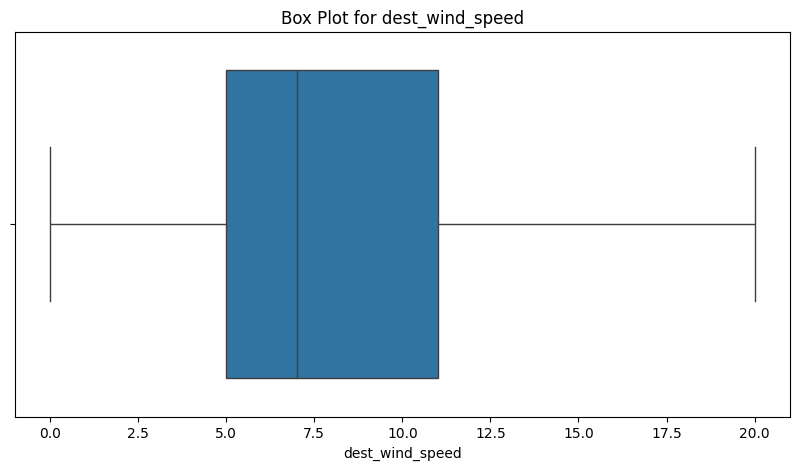

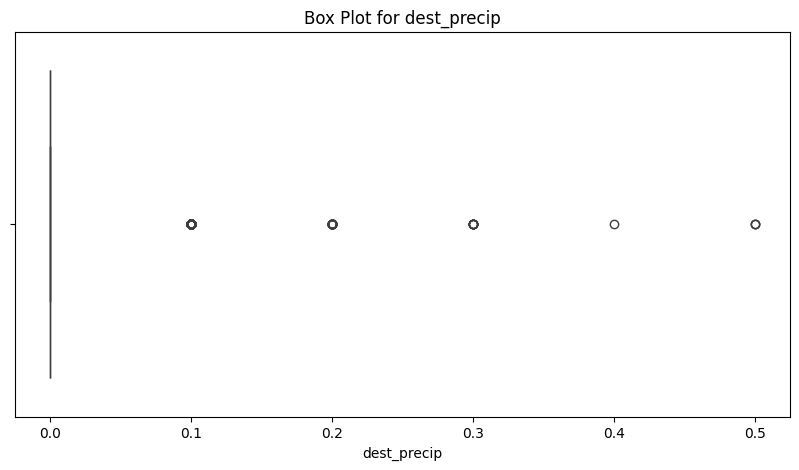

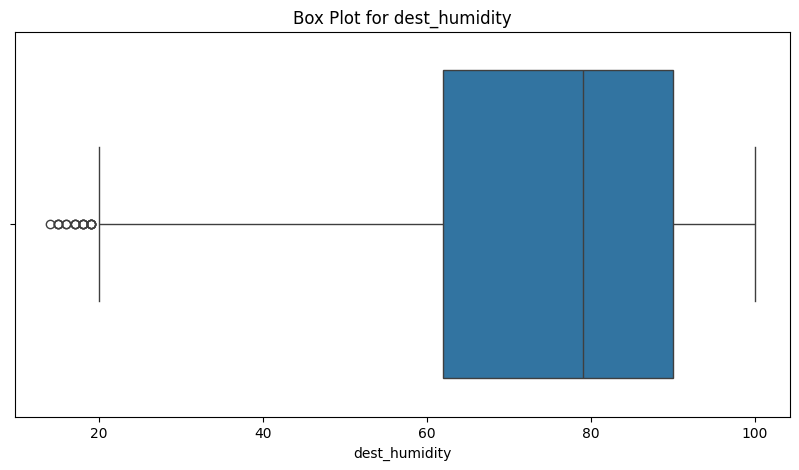

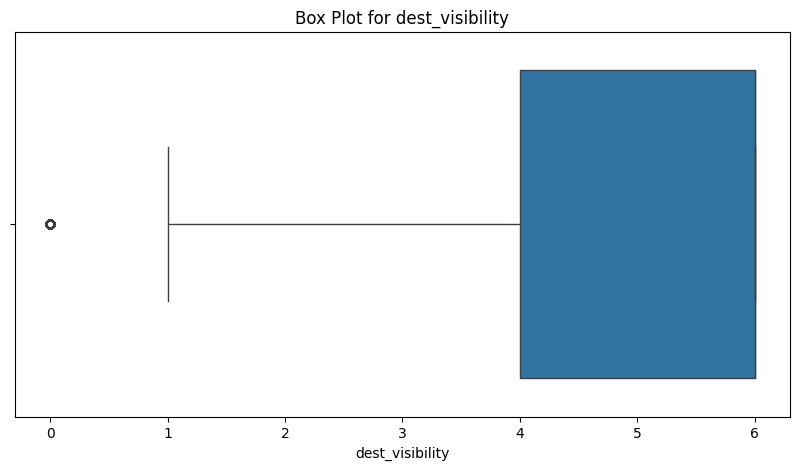

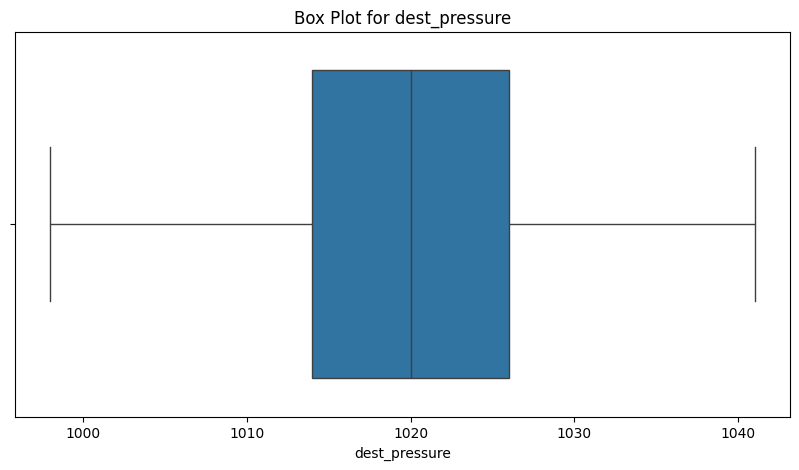

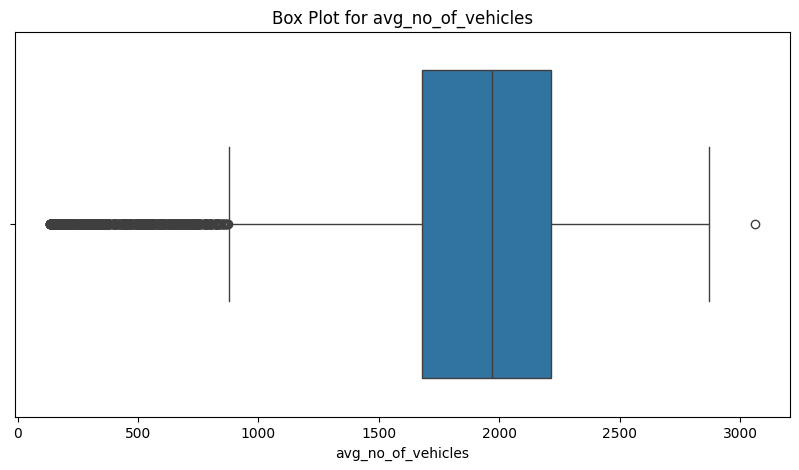

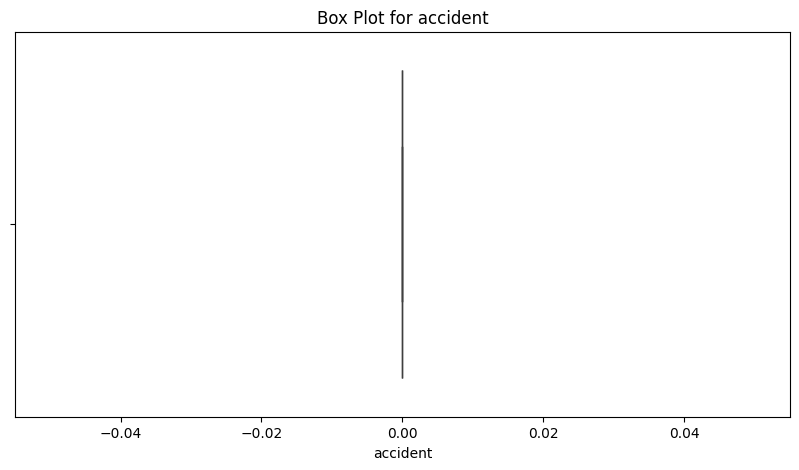

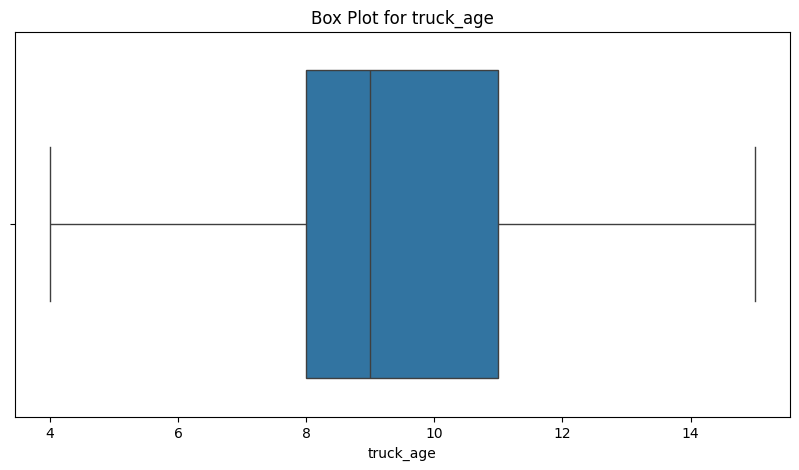

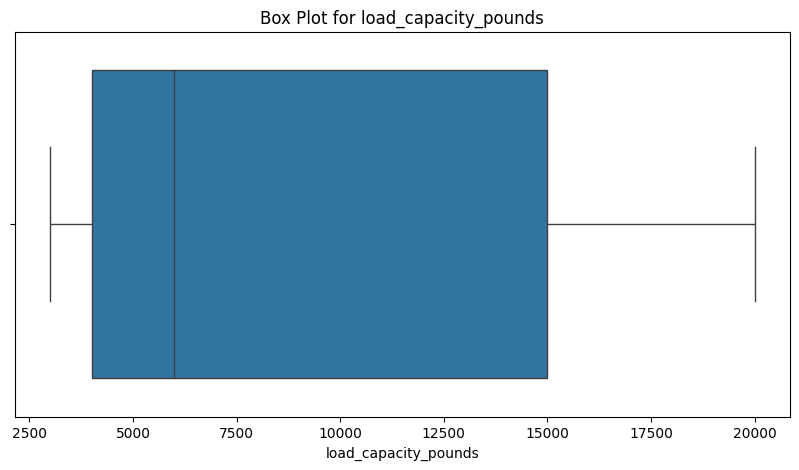

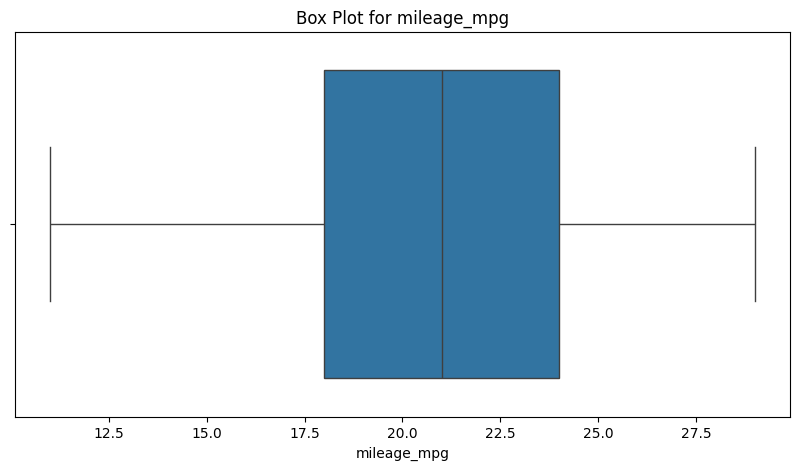

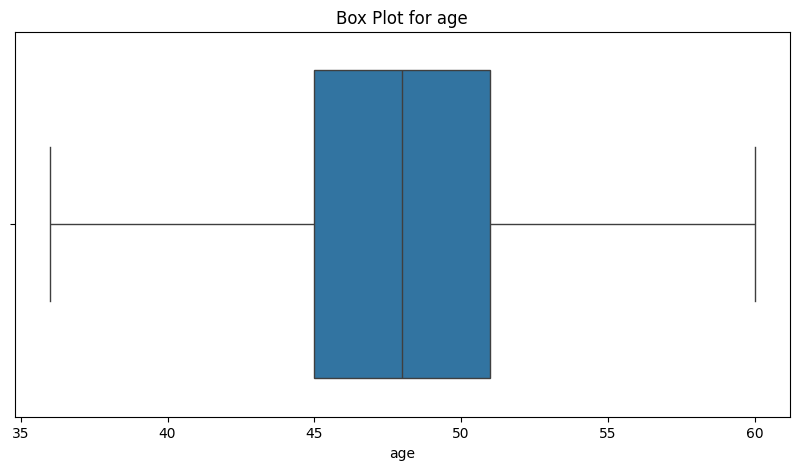

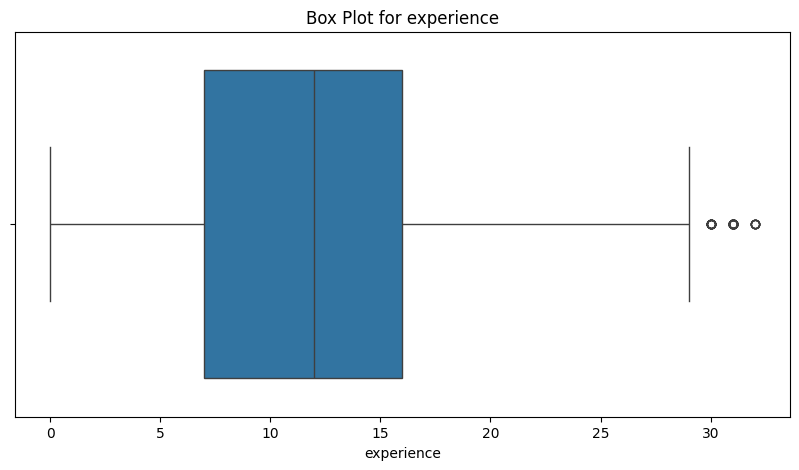

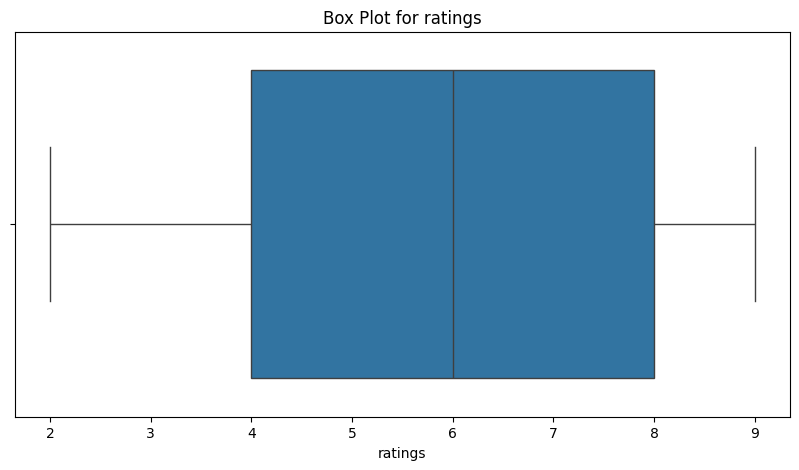

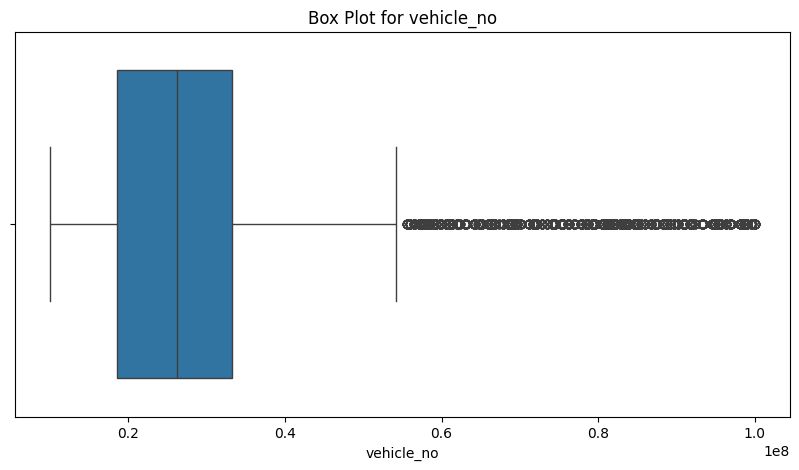

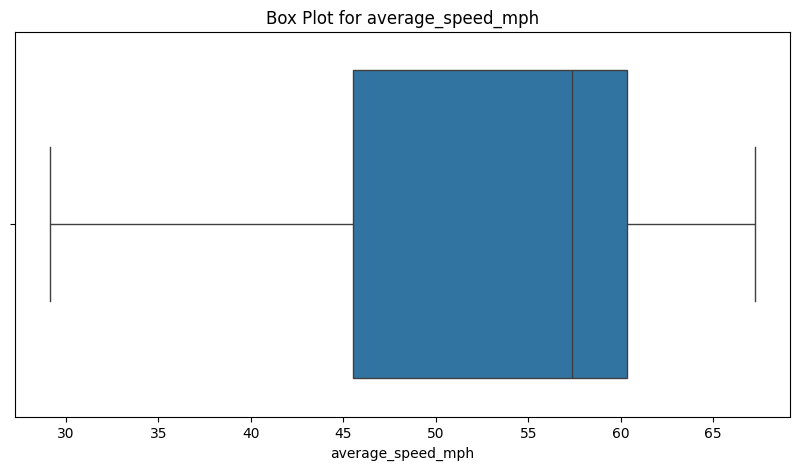

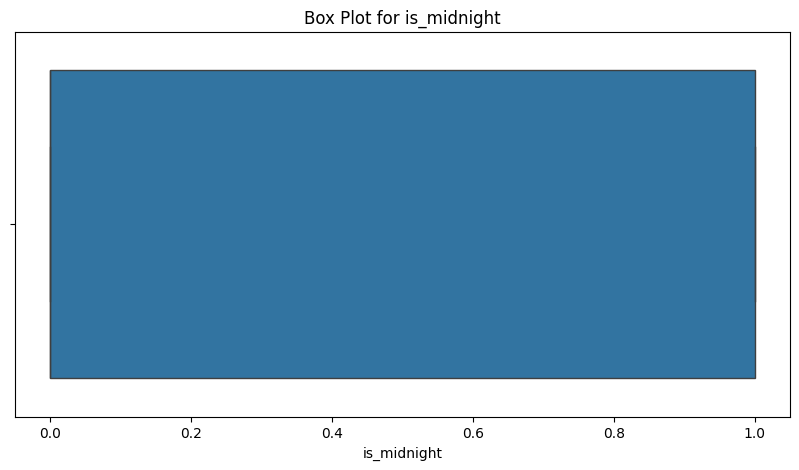

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for numeric columns to visualize outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()


In [14]:
cts_cols = ['route_avg_temp', 'route_avg_wind_speed', 'route_precip',
            'route_avg_humidity', 'route_visibility', 'route_avg_pressure',
            'distance', 'average_hours', 'origin_temp', 'origin_wind_speed',
            'origin_precip', 'origin_humidity', 'origin_visibility', 'origin_pressure',
            'dest_temp', 'dest_wind_speed', 'dest_precip',
            'dest_humidity', 'dest_visibility', 'dest_pressure',
            'avg_no_of_vehicles', 'truck_age', 'load_capacity_pounds', 'mileage_mpg',
            'age', 'experience', 'average_speed_mph']

cat_cols = ['route_description', 'origin_description', 'dest_description',
            'accident', 'fuel_type', 'gender', 'driving_style', 'ratings', 'is_midnight']

target = ['delay']

In [15]:
df['estimated_arrival'].max()

'2019-02-13 06:46:48'

In [16]:
df['estimated_arrival'] = pd.to_datetime(
    df['estimated_arrival'], errors='coerce')

In [17]:
train_df = df[df['estimated_arrival'] <= pd.to_datetime('2019-01-30')]

validation_df = df[(df['estimated_arrival'] > pd.to_datetime('2019-01-30')) &

                   (df['estimated_arrival'] <= pd.to_datetime('2019-02-07'))]

test_df = df[df['estimated_arrival'] > pd.to_datetime('2019-02-07')]

In [18]:
train_df.reset_index(drop=True, inplace=True)
validation_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [19]:
# Selection of features and target for each dataset
X_train = train_df[cts_cols + cat_cols]
y_train = train_df['delay']
X_valid = validation_df[cts_cols + cat_cols]
y_valid = validation_df['delay']
X_test = test_df[cts_cols + cat_cols]
y_test = test_df['delay']

In [20]:
X_train.shape

(7299, 36)

In [21]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ecoder_columns = ['route_description', 'origin_description',
                  'dest_description', 'fuel_type', 'gender', 'driving_style']

# Initializing the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[ecoder_columns])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

cat_cols = ['route_description', 'origin_description', 'dest_description',
'accident', 'fuel_type', 'gender', 'driving_style', 'ratings', 'is_midnight']


In [22]:
encoder_columns = ['route_description', 'origin_description',
                   'dest_description', 'fuel_type', 'gender', 'driving_style']

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [24]:
encoded_features = list(encoder.get_feature_names_out(ecoder_columns))

In [25]:
X_train[encoded_features] = encoder.transform(X_train[ecoder_columns])

X_valid[encoded_features] = encoder.transform(X_valid[ecoder_columns])

X_test[encoded_features] = encoder.transform(X_test[ecoder_columns])

2024-10-18 15:35:42,268 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2024-10-18 15:35:42,270 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2024-10-18 15:35:42,271 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2024-10-18 15:35:42,271 WARNING: S

In [26]:
X_train.shape

(7299, 150)

In [27]:
X_train = X_train.drop(ecoder_columns, axis=1)
X_valid = X_valid.drop(ecoder_columns, axis=1)

X_test = X_test.drop(ecoder_columns, axis=1)

In [28]:
print("Shape of X_train_encoded:", X_train.shape)
print("Shape of X_train_encoded_df:", X_valid.shape)

Shape of X_train_encoded: (7299, 144)
Shape of X_train_encoded_df: (1910, 144)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[cts_cols] = scaler.fit_transform(X_train[cts_cols])
X_valid[cts_cols] = scaler.transform(X_valid[cts_cols])
X_test[cts_cols] = scaler.transform(X_test[cts_cols])

In [30]:
X_train.head()

,route_avg_temp,route_avg_wind_speed,route_precip,route_avg_humidity,route_visibility,route_avg_pressure,distance,average_hours,origin_temp,origin_wind_speed,...,dest_description_Patchy rain possible,dest_description_Patchy snow possible,dest_description_Sunny,dest_description_Torrential rain shower,fuel_type_diesel,fuel_type_gas,gender_female,gender_male,driving_style_conservative,driving_style_proactive
0,0.868044,-0.380590,-0.287846,0.216809,-0.063815,0.768091,-0.649235,-0.648912,-0.233129,-0.284420,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.798635,-0.402638,4.623005,-0.823777,-1.193920,-0.979202,0.520608,0.520763,0.056507,-0.524778,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,-0.406116,-1.328680,-0.287846,1.730390,-4.983099,1.054286,0.373021,0.373229,1.330904,0.677016,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.397051,1.300617,-0.287846,1.500650,0.102377,-0.380453,-0.462830,-0.462506,-0.233129,2.599886,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-1.759602,-0.601076,-0.287846,-0.121043,-0.396199,1.031692,-1.044058,-1.043810,1.504686,0.677016,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [31]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pickle

In [32]:
from sklearn.metrics import accuracy_score, classification_report

In [33]:
def run_model_training(model, param_grid, model_name, X_train, y_train, X_valid, y_valid, X_test, y_test):
    try:
        # Start a new MLflow run for each model training session
        with mlflow.start_run(run_name=model_name):
            # Oversampling the training set using SMOTE to handle class imbalance
            smote = SMOTE()
            X_train_resampled, y_train_resampled = smote.fit_resample(
                X_train, y_train)

            grid_search = GridSearchCV(
                estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

            # Fitting the model with resampled training data
            print(f"Training {model_name} with GridSearchCV...")
            grid_search.fit(X_train_resampled, y_train_resampled)

            # Log the best parameters found by GridSearchCV
            best_params = grid_search.best_params_
            mlflow.log_params(best_params)
            print(f"Best parameters for {model_name}: {best_params}")

            # Predict on the training set
            train_predictions = grid_search.predict(X_train_resampled)
            train_report = classification_report(
                y_train_resampled, train_predictions, output_dict=True)
            print(f"Training Classification Report for {
                  model_name}:\n", classification_report(y_train_resampled, train_predictions))
            mlflow.log_dict(train_report, f"{
                            model_name}_training_classification_report.json")

            # Predict on the validation set
            valid_predictions = grid_search.predict(X_valid)
            valid_report = classification_report(
                y_valid, valid_predictions, output_dict=True)
            print(f"Validation Classification Report for {
                  model_name}:\n", classification_report(y_valid, valid_predictions))
            mlflow.log_dict(valid_report, f"{
                            model_name}_validation_classification_report.json")

            # Predict on the test set
            test_predictions = grid_search.predict(X_test)
            test_report = classification_report(
                y_test, test_predictions, output_dict=True)
            print(f"Test Classification Report for {
                  model_name}:\n", classification_report(y_test, test_predictions))
            mlflow.log_dict(
                test_report, f"{model_name}_test_classification_report.json")

            # Log the trained model along with its signature
            signature = mlflow.models.infer_signature(
                X_train, train_predictions)
            mlflow.sklearn.log_model(
                grid_search.best_estimator_, artifact_path=model_name, signature=signature)
            print(f"Model for {model_name} logged to MLflow.")

            return train_report, valid_report, test_report, grid_search.best_estimator_

    except Exception as e:
        print(f"An error occurred while training {model_name}: {e}")
        raise  # Re-raise the exception to debug if necessary
    finally:
        mlflow.end_run()

In [34]:
import pickle


def find_and_save_best_model(model_reports, model_filename='best_model.pkl'):
    best_model_name = None
    best_model = None
    best_score = 0

    # Iterate through the model reports to find the best model based on validation accuracy
    for model_name, reports in model_reports.items():
        # Extract the validation accuracy from the report
        # Ensure 'accuracy' is available in the report
        valid_accuracy = reports['valid_report']['accuracy']

        print(f"{model_name} - Validation Accuracy: {valid_accuracy:.4f}")

        # Check if this model has the highest accuracy
        if valid_accuracy > best_score:
            best_score = valid_accuracy
            best_model_name = model_name
            # Retrieve the model object stored in the report
            best_model = reports['model']

    # Save the best model as a pickle file
    if best_model is not None:
        with open(model_filename, 'wb') as f:
            pickle.dump(best_model, f)  # Use pickle to serialize the model
        print(f"Best model '{best_model_name}' saved as '{
              model_filename}' with validation accuracy: {best_score:.4f}")
    else:
        print("No models were trained successfully.")

In [35]:
model_reports = {}
models_info = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100,200],  # Reduced to speed up training
        'max_depth': [10, 15],  # Moderate depth for faster and more generalizable splits
        'min_samples_split': [2, 5],  # Moderate split to prevent overfitting
        'min_samples_leaf': [1, 2],  # Prevent overfitting on very small leafs
        'class_weight': ['balanced']  # Handle class imbalance
    }),
    'Logistic Regression': (LogisticRegression(max_iter=300), {  # Reduced iterations for faster convergence
        'C': [0.1, 1],  # Simplified range for regularization
        'solver': ['liblinear'],  # Faster solver for small datasets
        'class_weight': ['balanced']  # Handle class imbalance
    }),
    'XGBoost': (XGBClassifier(), {
        'max_depth': [100,150],  # Reduced depth for faster training
        'n_estimators': [50, 100],  # Reduced number of trees
        'learning_rate': [0.05, 0.1,0.9],  # Focused learning rate
        'subsample': [0.8],  # Consistent subsample
        'colsample_bytree': [0.8],  # Reduce number of features per tree
        'reg_lambda': [0.1, 1],  # L2 regularization to prevent overfitting
        'reg_alpha': [0.1, 1]  # L1 regularization to handle sparsity
    })
}


for model_name, (model, params) in models_info.items():
    print(f"Training and evaluating {model_name}...")

    # Use the updated run_model_training function that logs training, validation, and test reports
    train_report, valid_report, test_report, trained_model = run_model_training(
        model, params, model_name, X_train, y_train, X_valid, y_valid, X_test, y_test
    )

    # Store reports for later review, including the trained model
    model_reports[model_name] = {
        'train_report': train_report,
        'valid_report': valid_report,
        'test_report': test_report,
        'model': trained_model  # Store the trained model here
    }

# Optionally, print classification reports
for model_name, reports in model_reports.items():
    print(f"\nClassification Report for {model_name} - Training Data:")
    for label, metrics in reports['train_report'].items():
        print(f"{label}: {metrics}")

    print(f"\nClassification Report for {model_name} - Validation Data:")
    for label, metrics in reports['valid_report'].items():
        print(f"{label}: {metrics}")

    print(f"\nClassification Report for {model_name} - Test Data:")
    for label, metrics in reports['test_report'].items():
        print(f"{label}: {metrics}")

# Find and save the best model
find_and_save_best_model(model_reports)

Training and evaluating Random Forest...
Training Random Forest with GridSearchCV...
Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5040
           1       0.99      0.95      0.97      5040

    accuracy                           0.97     10080
   macro avg       0.97      0.97      0.97     10080
weighted avg       0.97      0.97      0.97     10080

Validation Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1297
           1       0.72      0.53      0.61       613

    accuracy                           0.78      1910
   macro avg       0.76      0.72      0.73      1910
weighted avg       0.78      0.78      0.77      1910

Test Cla